Solver for reading the stars

In [ ]:
# Module Initialization

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
from torch import nn
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Normalize(
        mean=np.array([0.1086, 0.0934, 0.0711]),
        std=np.array([0.1472, 0.123, 0.1032]))
])

import h5py

SEED = 1337
torch.manual_seed(SEED)
np.random.seed(SEED)
torch.use_deterministic_algorithms(True)

from model import StarChartModel, StarData

In [3]:
# Setup for training dataset - 1

with h5py.File("train.1.h5", "r") as F:
    train_images1 = np.array(F["X"])
    train_labels1 = np.array(F["y"])
with h5py.File("train.2.h5", "r") as F:
    train_images2 = np.array(F["X"])
    train_labels2 = np.array(F["y"])
train_images = np.concatenate((train_images1, train_images2))
train_labels = np.concatenate((train_labels1, train_labels2))

In [4]:
# Setup for training dataset - setup model

batch_size = 32
train_set = StarData((train_images.transpose(0,3,1,2)/255), train_labels, transform=preprocess)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
    shuffle=True, num_workers=1, pin_memory=True)

In [5]:
# Create array for flag as qr image in 33 x 33

flag = np.zeros((33,33))

In [6]:
# Training dataset

model = StarChartModel([0.3,0.15])
model.train()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.0005)

In [7]:
# Training dataset with 50 epoch

# Add this code to your main script
num_epochs = 50  # Set the number of epochs for training

for epoch in range(num_epochs):
    epoch_loss = 0
    for i, (X, y, target_class) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_func(outputs, target_class)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader):.6f}")

Epoch [1/50], Loss: 0.650809
Epoch [2/50], Loss: 0.481797
Epoch [3/50], Loss: 0.437756
Epoch [4/50], Loss: 0.424036
Epoch [5/50], Loss: 0.408969
Epoch [6/50], Loss: 0.399611
Epoch [7/50], Loss: 0.392899
Epoch [8/50], Loss: 0.391958
Epoch [9/50], Loss: 0.387949
Epoch [10/50], Loss: 0.380210
Epoch [11/50], Loss: 0.378262
Epoch [12/50], Loss: 0.375539
Epoch [13/50], Loss: 0.376360
Epoch [14/50], Loss: 0.371174
Epoch [15/50], Loss: 0.370830
Epoch [16/50], Loss: 0.367376
Epoch [17/50], Loss: 0.368680
Epoch [18/50], Loss: 0.365553
Epoch [19/50], Loss: 0.367930
Epoch [20/50], Loss: 0.363411
Epoch [21/50], Loss: 0.363600
Epoch [22/50], Loss: 0.360305
Epoch [23/50], Loss: 0.359009
Epoch [24/50], Loss: 0.355762
Epoch [25/50], Loss: 0.358112
Epoch [26/50], Loss: 0.357742
Epoch [27/50], Loss: 0.356733
Epoch [28/50], Loss: 0.357835
Epoch [29/50], Loss: 0.356348
Epoch [30/50], Loss: 0.356412
Epoch [31/50], Loss: 0.357918
Epoch [32/50], Loss: 0.355139
Epoch [33/50], Loss: 0.355634
Epoch [34/50], Loss

In [8]:
# Setup data test

with h5py.File("test.h5/test.h5", "r") as F:
    test_images = np.array(F["X"])

test_set = StarData((test_images.reshape(-1, 69, 69, 3).transpose(0, 3, 1, 2) / 255), None, transform=preprocess)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False, num_workers=1, pin_memory=True)

In [9]:
# Predict data test from model that already trained, split every two dataset and find average

model.eval()
predicted_labels = []

for i in range(0, len(test_set), 2):
    outputs = []
    for j in range(2):
        X = test_set[i + j]
        output = model(X[0].unsqueeze(0))
        outputs.append(output)
    avg_outputs = torch.mean(torch.stack(outputs), dim=0)
    _, pred = torch.max(avg_outputs, 1)
    predicted_labels.append(pred.item())

predicted_labels = np.array(predicted_labels).reshape(33, 33)

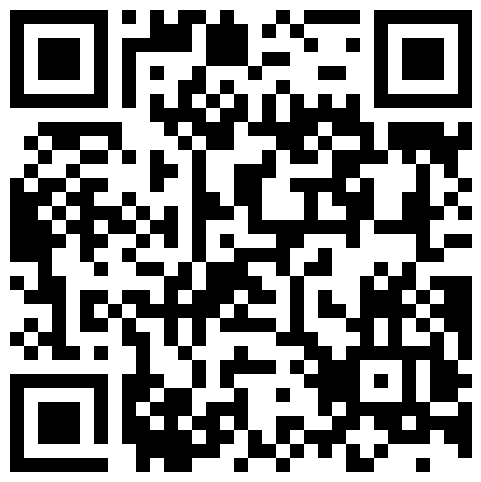

In [10]:
# Draw classification result

# Add this code to your main script
plt.figure(figsize=(6, 6))
plt.imshow(predicted_labels, cmap='gray')
plt.axis('off')
plt.show()